In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import cv2
%matplotlib inline
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML

files1 = os.listdir('test_images/')
files = [x for x in files1 if ('Res' not in x) and ('.db' not in x)]

## Test on Images

### Lines Detection Function 1

In [86]:
def LineDet(img, kernel_size=7, low_threshold=80, high_threshold=160, rho=1, theta = 1*np.pi/180, 
            threshold=4, min_line_length=5, max_line_gap=1):
    # Converting into gray
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # Smoothing
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    # Canny Edge detecting
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    # region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
    imshape = img.shape
    vertices = np.array([[(round(imshape[1]/7),imshape[0]),
                          (round(3*imshape[1]/7), round(3*imshape[0]/5)), 
                          (round(5*imshape[1]/9), round(3*imshape[0]/5)),
                          (round(11*imshape[1]/12),imshape[0])]],
                          dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    # Line Detecting
    line_image = np.copy(img)*0
    # Hough transforming
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)   
    # Drawing the lines on the initial image
    combo = cv2.addWeighted(img, 0.8, line_image, 1, 0)
    return combo

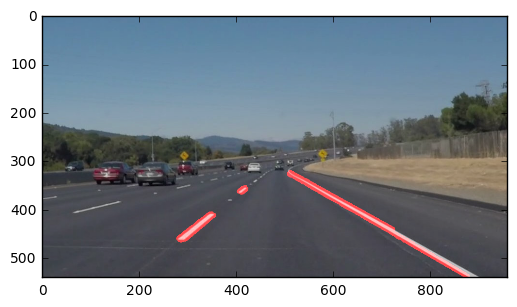

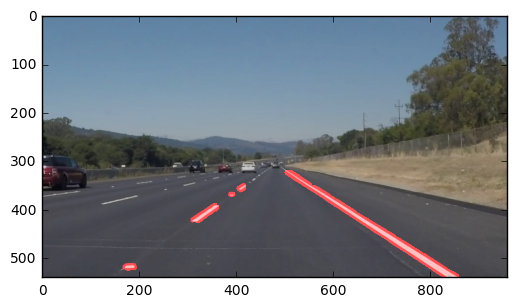

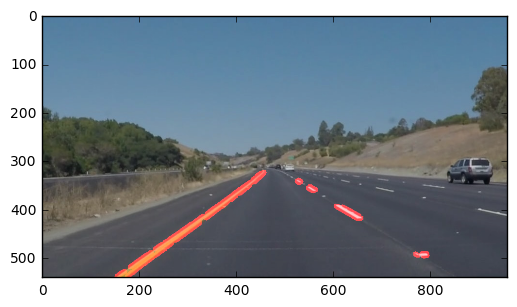

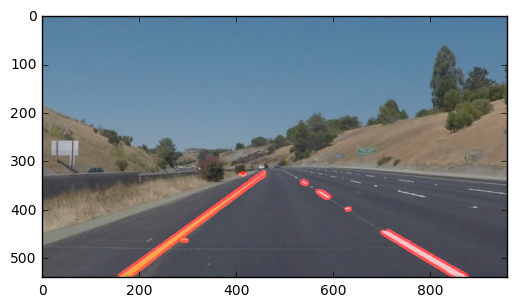

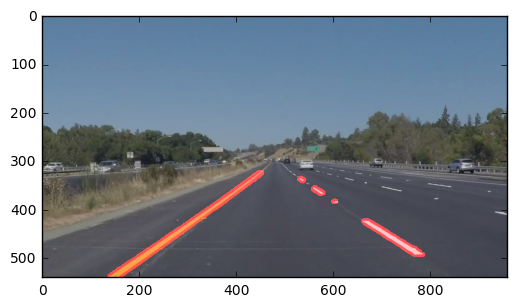

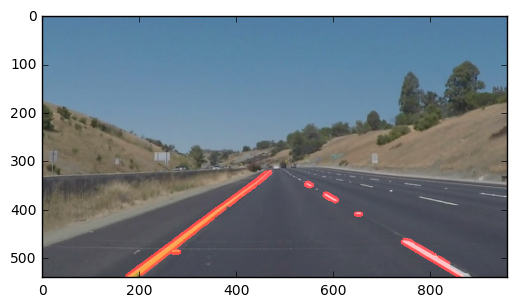

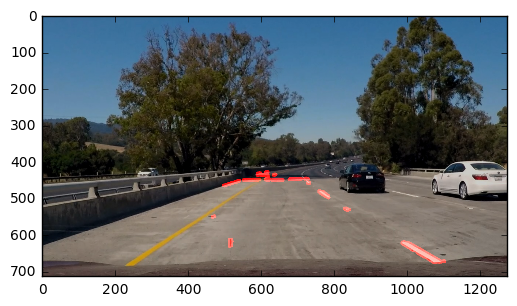

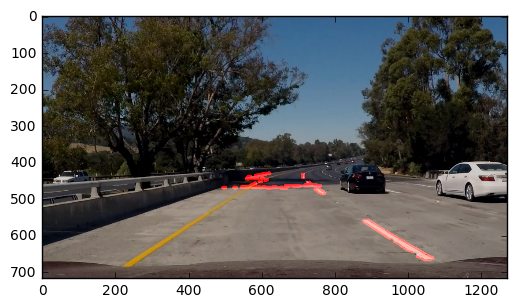

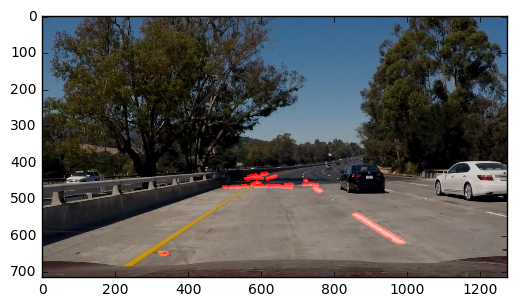

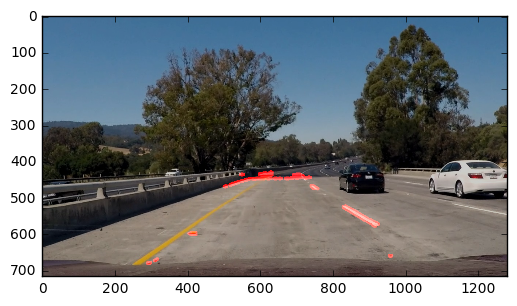

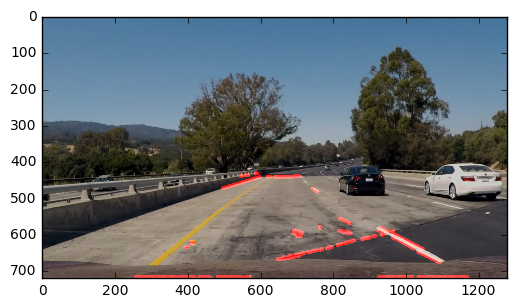

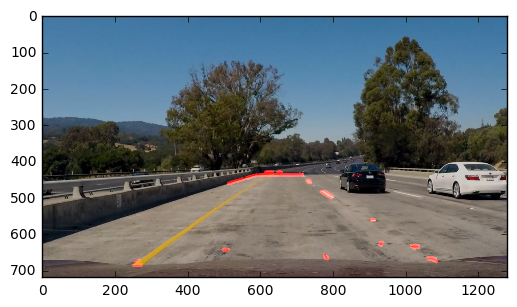

In [87]:
for i in files:
    plt.imshow(LineDet(mpimg.imread('test_images/'+i)))
    plt.savefig('test_images/'+'Res_'+i)
    plt.show()

### Lines Detection Function 2

In [10]:
def LineDet2(img, kernel_size=7, low_threshold=90, high_threshold=180, rho=1, theta = 1*np.pi/180, 
            threshold=4, min_line_length=5, max_line_gap=1):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # Smoothing
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    # Canny Edge detecting
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    # region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
    imshape = img.shape
    vertices = np.array([[(round(imshape[1]/7),imshape[0]),
                          (round(3*imshape[1]/7), round(3*imshape[0]/5)), 
                          (round(5*imshape[1]/9), round(3*imshape[0]/5)),
                          (round(11*imshape[1]/12),imshape[0])]],
                          dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    # Line detecting
    line_image = np.copy(img)*0
    # Hough transforming
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    x_left = []
    y_left = []
    x_right = []
    y_right = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            z = (y2-y1)/(x2-x1)
            if z<-0.4:
                x_left.append(x1)
                x_left.append(x2)
                y_left.append(y1)
                y_left.append(y2)
            elif z>0.4:
                x_right.append(x1)
                x_right.append(x2)
                y_right.append(y1)
                y_right.append(y2)
    if (y_left == []) or (y_right == []):
        for line in lines:
            for x1,y1,x2,y2 in line:
                z = (y2-y1)/(x2-x1)
                if z<-0.05:
                    x_left.append(x1)
                    x_left.append(x2)
                    y_left.append(y1)
                    y_left.append(y2)
                if z>0.05:
                    x_right.append(x1)
                    x_right.append(x2)
                    y_right.append(y1)
                    y_right.append(y2)
    left = np.poly1d(np.polyfit(y_left, x_left,1))
    right = np.poly1d(np.polyfit(y_right, x_right,1))

    Y1L = imshape[0]
    X1L = int(left(Y1L))
    Y2L = round(3*imshape[0]/5)
    X2L = int(left(Y2L))
    Y1R = imshape[0]
    X1R = int(right(Y1R))
    Y2R = round(3*imshape[0]/5)
    X2R = int(right(Y2R))
    
    cv2.line(line_image,(X1L,Y1L),(X2L,Y2L),(255,0,0),10)
    cv2.line(line_image,(X1R,Y1R),(X2R,Y2R),(255,0,0),10)

    combo = cv2.addWeighted(img, 0.8, line_image, 1, 0)
    return combo

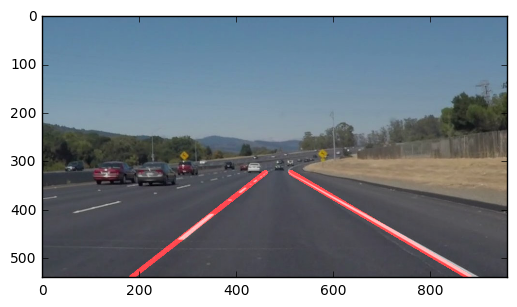

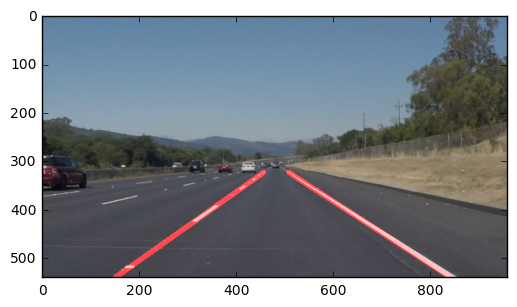

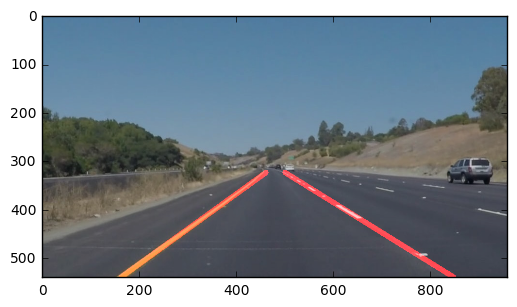

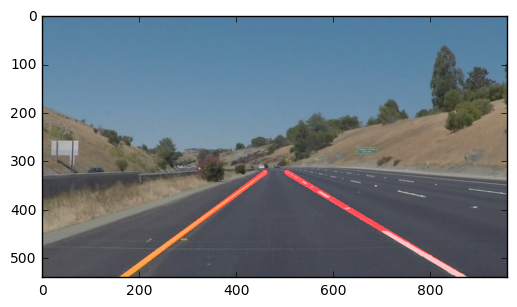

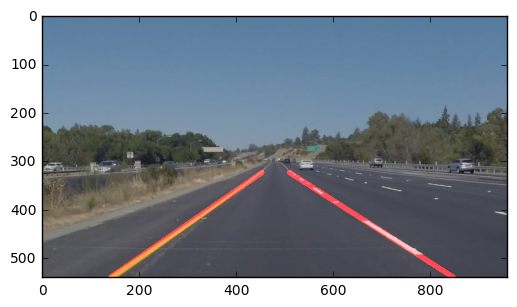

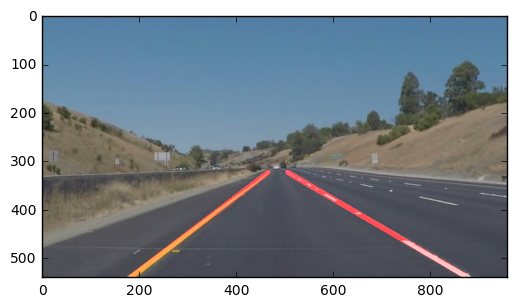

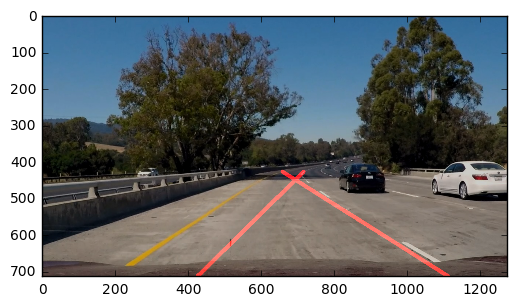

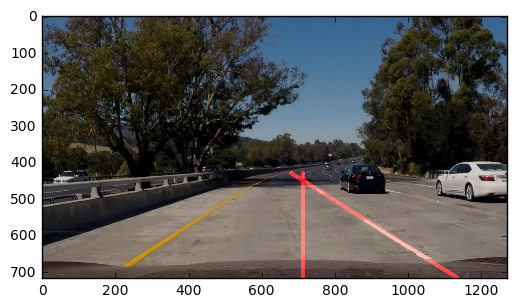

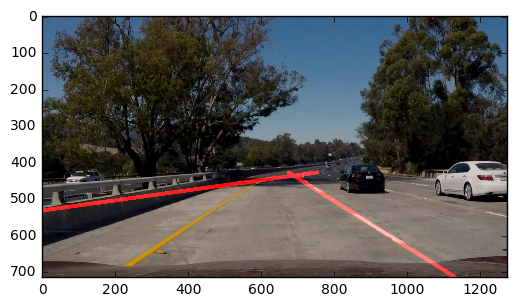

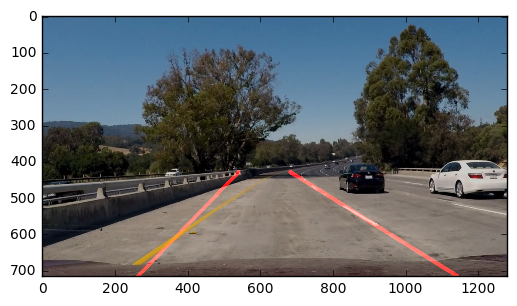

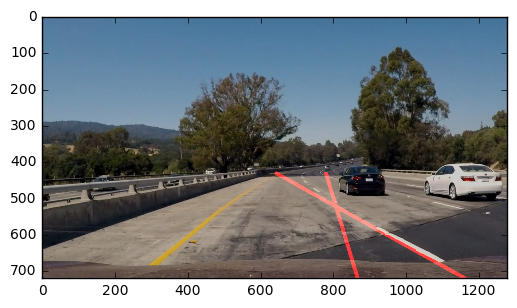

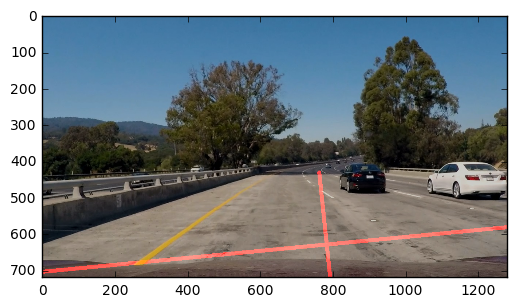

In [11]:
for i in files:
    plt.imshow(LineDet2(mpimg.imread('test_images/'+i)))
    plt.savefig('test_images/'+'Res_'+i)
    plt.show()

### Lines Detection Function 3

In [2]:
def LineDet3(img, kernel_size=7, low_threshold=30, high_threshold=80, rho=1, theta = 1*np.pi/180, 
            threshold=3, min_line_length=10, max_line_gap=1):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # Smoothing
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    # Canny Edge detecting
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    # region of interest
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
    imshape = img.shape
    vertices = np.array([[(round(imshape[1]/7),imshape[0]),
                          (round(3*imshape[1]/7), round(3*imshape[0]/5)), 
                          (round(5*imshape[1]/9), round(3*imshape[0]/5)),
                          (round(11*imshape[1]/12),imshape[0])]],
                          dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    # Line detecting
    line_image = np.copy(img)*0
    # Hough transforming
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    x_left = []
    y_left = []
    x_right = []
    y_right = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            z = (y2-y1)/(x2-x1)
            if z<-0.4:
                x_left.append(x1)
                x_left.append(x2)
                y_left.append(y1)
                y_left.append(y2)
            elif z>0.4:
                x_right.append(x1)
                x_right.append(x2)
                y_right.append(y1)
                y_right.append(y2)
    if (y_left == []) or (y_right == []):
        for line in lines:
            for x1,y1,x2,y2 in line:
                z = (y2-y1)/(x2-x1)
                if z<-0.05:
                    x_left.append(x1)
                    x_left.append(x2)
                    y_left.append(y1)
                    y_left.append(y2)
                if z>0.05:
                    x_right.append(x1)
                    x_right.append(x2)
                    y_right.append(y1)
                    y_right.append(y2)
    left = np.poly1d(np.polyfit(y_left, x_left,1))
    right = np.poly1d(np.polyfit(y_right, x_right,1))

    Y1L = imshape[0]
    X1L = int(left(Y1L))
    Y2L = round(3*imshape[0]/5)
    X2L = int(left(Y2L))
    Y1R = imshape[0]
    X1R = int(right(Y1R))
    Y2R = round(3*imshape[0]/5)
    X2R = int(right(Y2R))
    
    cv2.line(line_image,(X1L,Y1L),(X2L,Y2L),(255,0,0),10)
    cv2.line(line_image,(X1R,Y1R),(X2R,Y2R),(255,0,0),10)

    combo = cv2.addWeighted(img, 0.8, line_image, 1, 0)
    return combo

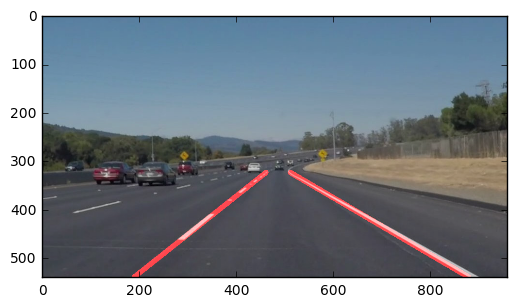

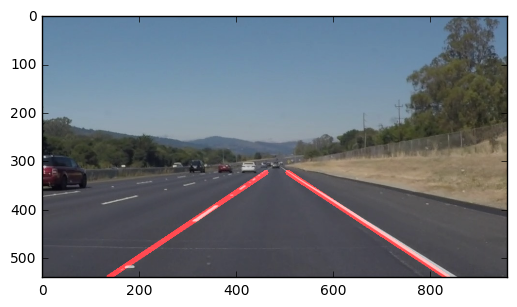

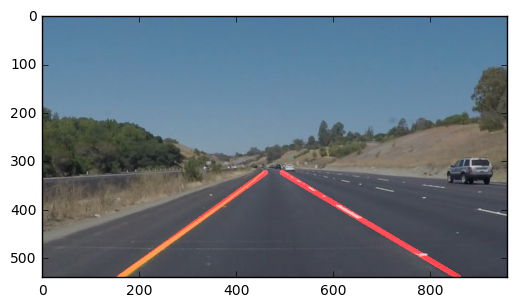

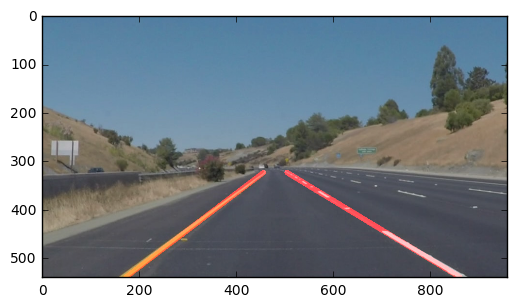

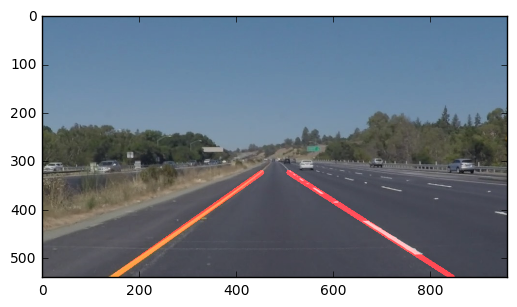

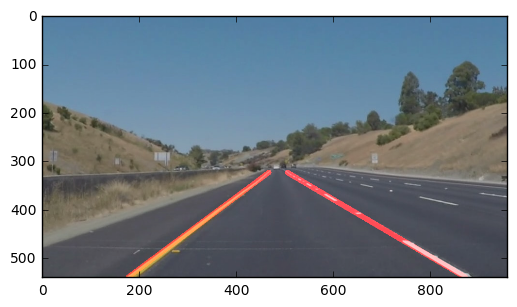

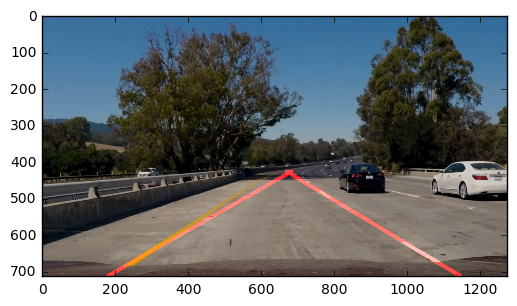

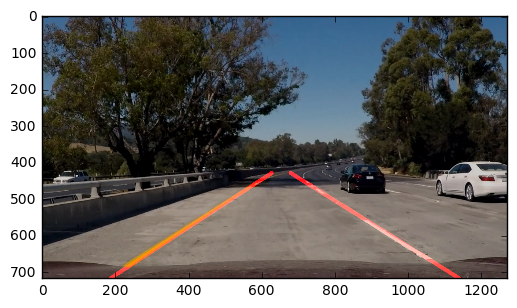

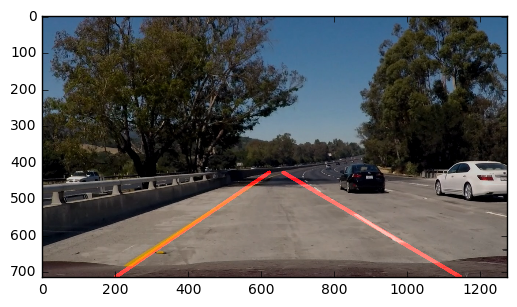

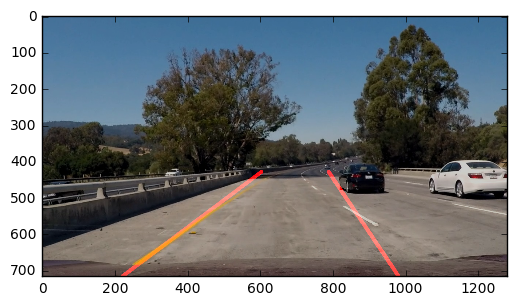

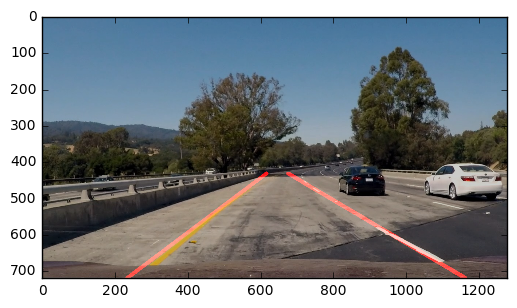

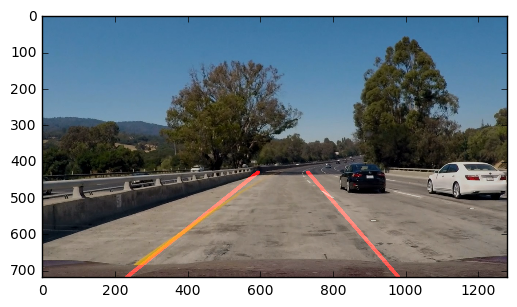

In [16]:
for i in files:
    plt.imshow(LineDet3(mpimg.imread('test_images/'+i)))
    plt.savefig('test_images/'+'Res_'+i)
    plt.show()

## Test on Videos

### Example 1: solidWhiteRight.mp4

In [12]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(LineDet2)
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|███████████████████████████████████████▊| 221/222 [00:15<00:00, 11.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

Wall time: 17.3 s


In [13]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

### Example 2: solidYellowLeft.mp4

In [14]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(LineDet2)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|███████████████████████████████████████▉| 681/682 [00:56<00:00, 12.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

Wall time: 57.8 s


In [15]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

### Example 3: challenge.mp4

In [17]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(LineDet3)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4


100%|████████████████████████████████████████| 251/251 [00:29<00:00,  8.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

Wall time: 33.1 s


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

## Reflections
The pipeline consists of elements given in lessons:
* Grayscale conversion,
* Gaussian smoothing,
* Edge detecting by using Canny algorithm,
* Calculating region of interest,
* Line detecting by using Hough transforming,
* Picturing the lane lines.

The pipeline has some hyperparameters (including region of interest) which allow to tailor this approach to a certain input (it may be pictures, videos), but after trying this pipeline on different examples, we can underline the following drawbacks: 
* The pipline with the same hyperparameters doesn't cope with different conditions. For example, in the last video it's complicated to find the yellow line.
* Lane lines have a different forms (not only line itself), but we consider only lines.

According to the drawbacks of the algorithm given here is likely to fail in next situations:
* Sunny wheather conditions. It's difficult to calculate area with lines, because derivatives used in Canny approach wouldn't have big value.
* Lots of contrasting areas in region of interest: new and old asphalts, elements of a vehicle in front and so on.
* Lane lines with curved forms. In this case output line will not coinside with a real line.

### Possible improvements points (my assumptions):
* According to the first and the second points, it seems a good idea apply additional transformation(-s) before Canny algorithm: something which increase contrast ratio of yellow and white.
* Additional conditions for defining lines, for exampe how far candidate lines from centre.
* For lines with different forms: maybe they should be pictured as a set of short lines with different slopes.

Finally, we also should think about how fast our pipeline works because all calculations must be done in onine mode.